# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url =f"{url}&units={units}&appid={weather_api_key}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=a8408b6e1ea2314fd02eb179a23ae369&q=


In [9]:
cities =["Atlanta", "Albany", "Boston"]

In [35]:
time.sleep(1)
#setting up several lists to hold the weather info (based on teh HW CSV)
city_id =[]
city_name = []
cloudiness = []
country = []
date =[]
humidity =[]
Lat =[]
Lng =[]
max_temp = []
wind_speed = []
count= 0
#set= 1
record_count = 0
# open a print log
print_log= open("Weather_print_log.txt","w")

#open the csv, make the columns (lists), and pull the info to the csv 
my_weather_data = open("weatherAPI_data.csv", "w")
my_weather_data.write("City_ID, City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed\n")
#print(cities)
#Loop through cities
for city in cities:
    time.sleep(1)
    count= count + 1
    response =requests.get(query_url + city).json()
    
    #print(response)
    try:
        city_id.append(response["id"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"]
        #country.append(response["sys"]["country"])
        #date.append(response["dt"])
        #humidity.append(response["humidity"])
        #Lat.append(response["coord"]["lat"])
        #Lng.append(response["coord"]["lon"])
        #max_temp.append(response["temp_max"])
        #wind_speed.append(response["wind"]["speed"])
        
    except:
        print("City not found, skipping")
                          
    print(f"processing Record {count} | {city}")

SyntaxError: invalid syntax (<ipython-input-35-c8ae681d623c>, line 42)

## Convert Raw Data to DataFrame
* Save as csv

In [ ]:
#my_weather_data.to_csv('weatherAPI_data.csv')

In [36]:
#corrected-data_path = 'weatherAPI_data.csv'
corrected_data_path = "Resources/cities.csv"

corrected_data_df = pd.read_csv(corrected_data_path)
corrected_data_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

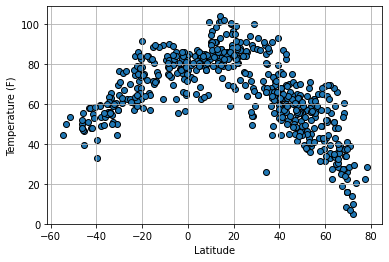

In [51]:
#date = corrected_data_df["Date"][0].strftime("%m/%d%y") how to add the date??????
lat_data = corrected_data_df["Lat"]
temp_data = corrected_data_df["Max Temp"]
plt.scatter(lat_data, temp_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
#plt.title(f"City Latitude vs Max Temperature {date}")
plt.savefig("Images/Lat_vs_temp.png")
plt.show()

### Latitude vs. Humidity Plot

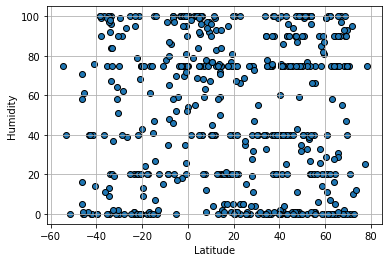

In [52]:
cloud_data = corrected_data_df["Humidity"]
plt.scatter(lat_data, hume_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
#plt.title(f"City Latitude vs Max Temperature {}")
plt.savefig("Images/Lat_vs_hume.png")
plt.show()

### Latitude vs. Cloudiness Plot

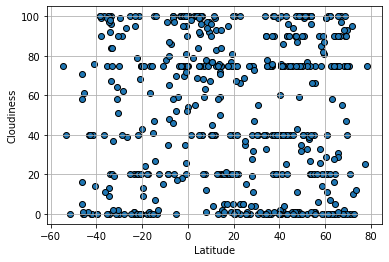

In [53]:
hume_data = corrected_data_df["Cloudiness"]
plt.scatter(lat_data, hume_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
#plt.title(f"City Latitude vs Max Temperature {}")
plt.savefig("Images/Lat_vs_cloud.png")
plt.show()

### Latitude vs. Wind Speed Plot

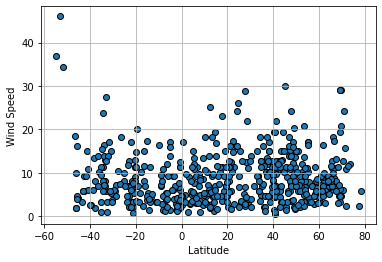

In [54]:
hume_data = corrected_data_df["Wind Speed"]
plt.scatter(lat_data, hume_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
#plt.title(f"City Latitude vs Max Temperature {}")
plt.savefig("Images/Lat_vs_Wind_Speed.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#Correlating the 
nh_mt = corrected_data_df["Total Tested"]
flights_values = corrected_data_df["Number of Flights"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(infected_values, flights_values)
regress_values = infected_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(infected_values,flights_values)


plt.plot(infected_values,regress_values,"r-")
plt.annotate(line_eq,(200000,2500),fontsize=15,color="red")
plt.xlabel('Total Infected')
plt.ylabel('Fight Landed')
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression